<a href="https://colab.research.google.com/github/LokeshTiwari004/RegressionInsurance/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [8]:
df = pd.read_csv('./data/train.csv')
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [12]:
df.columns = df.columns.map(lambda x: '_'.join(map(lambda y: y.lower(), x.split(' '))))
print(df.shape, df.columns)

(1200000, 21) Index(['id', 'age', 'gender', 'annual_income', 'marital_status',
       'number_of_dependents', 'education_level', 'occupation', 'health_score',
       'location', 'policy_type', 'previous_claims', 'vehicle_age',
       'credit_score', 'insurance_duration', 'policy_start_date',
       'customer_feedback', 'smoking_status', 'exercise_frequency',
       'property_type', 'premium_amount'],
      dtype='object')


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   age                   1181295 non-null  float64
 2   gender                1200000 non-null  object 
 3   annual_income         1155051 non-null  float64
 4   marital_status        1181471 non-null  object 
 5   number_of_dependents  1090328 non-null  float64
 6   education_level       1200000 non-null  object 
 7   occupation            841925 non-null   object 
 8   health_score          1125924 non-null  float64
 9   location              1200000 non-null  object 
 10  policy_type           1200000 non-null  object 
 11  previous_claims       835971 non-null   float64
 12  vehicle_age           1199994 non-null  float64
 13  credit_score          1062118 non-null  float64
 14  insurance_duration    1199999 non-

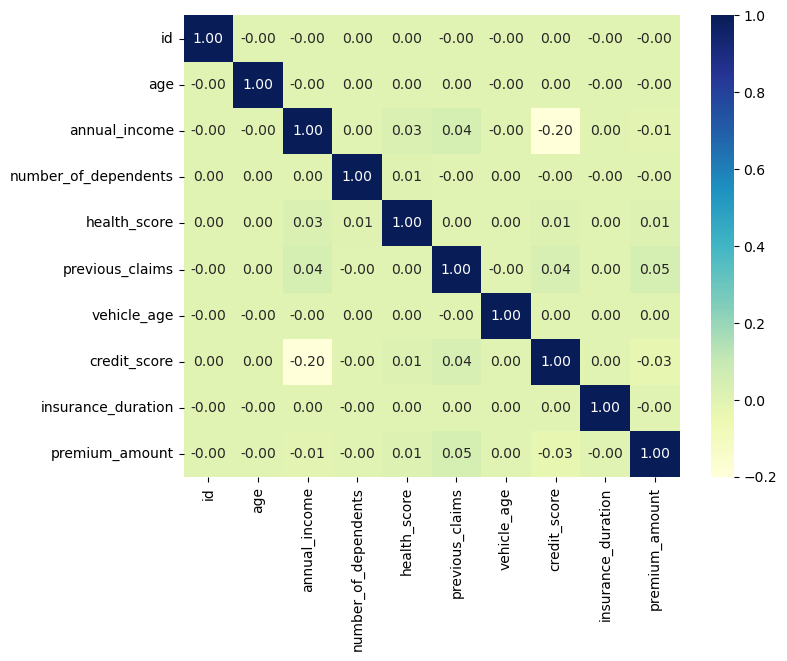

In [23]:
corr_mat = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, cmap="YlGnBu", fmt='.2f')
plt.show()

In [33]:
model = ols("premium_amount ~ age", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         premium_amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     6.976
Date:                Fri, 13 Dec 2024   Prob (F-statistic):            0.00826
Time:                        08:53:12   Log-Likelihood:            -9.6650e+06
No. Observations:             1181295   AIC:                         1.933e+07
Df Residuals:                 1181293   BIC:                         1.933e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1109.0366      2.546    435.568      0.0

In [43]:
for num_feat in corr_mat.columns[1:-1]:
  model = ols(f"premium_amount ~ {num_feat}", data=df).fit()
  pval = model.pvalues[num_feat]
  reg_significant = pval < 0.05
  print(num_feat, f'{pval:.4f}', reg_significant, 'Significant' if reg_significant else 'Insignificant')

age 0.0083 True Significant
annual_income 0.0000 True Significant
number_of_dependents 0.3080 False Insignificant
health_score 0.0000 True Significant
previous_claims 0.0000 True Significant
vehicle_age 0.6685 False Insignificant
credit_score 0.0000 True Significant
insurance_duration 0.9754 False Insignificant


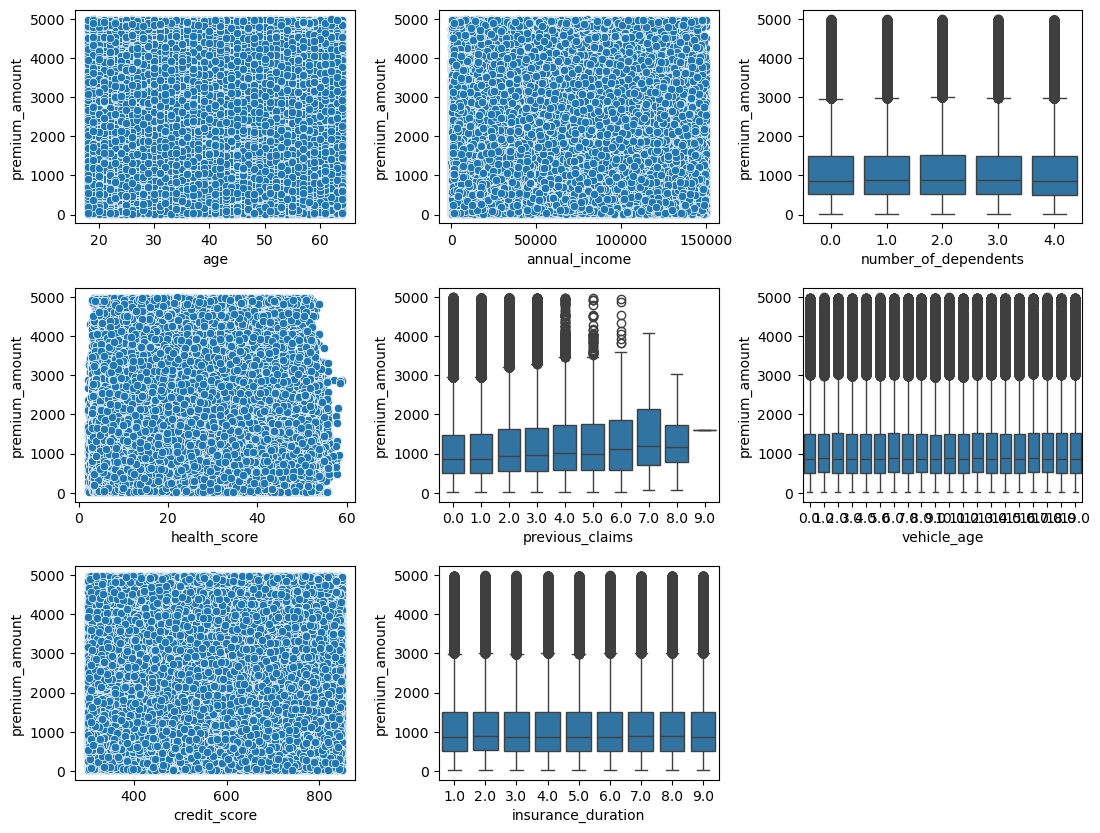

In [68]:
plt.figure(figsize=(13, 10))
for i, num_feat in enumerate(corr_mat.columns[1: -1]):
  plt.subplot(3, 3, i + 1)
  if df[num_feat].nunique() < 21:
    sns.boxplot(data=df, x=num_feat, y='premium_amount')
  else:
    sns.scatterplot(data=df, x=f'{num_feat}', y='premium_amount')
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

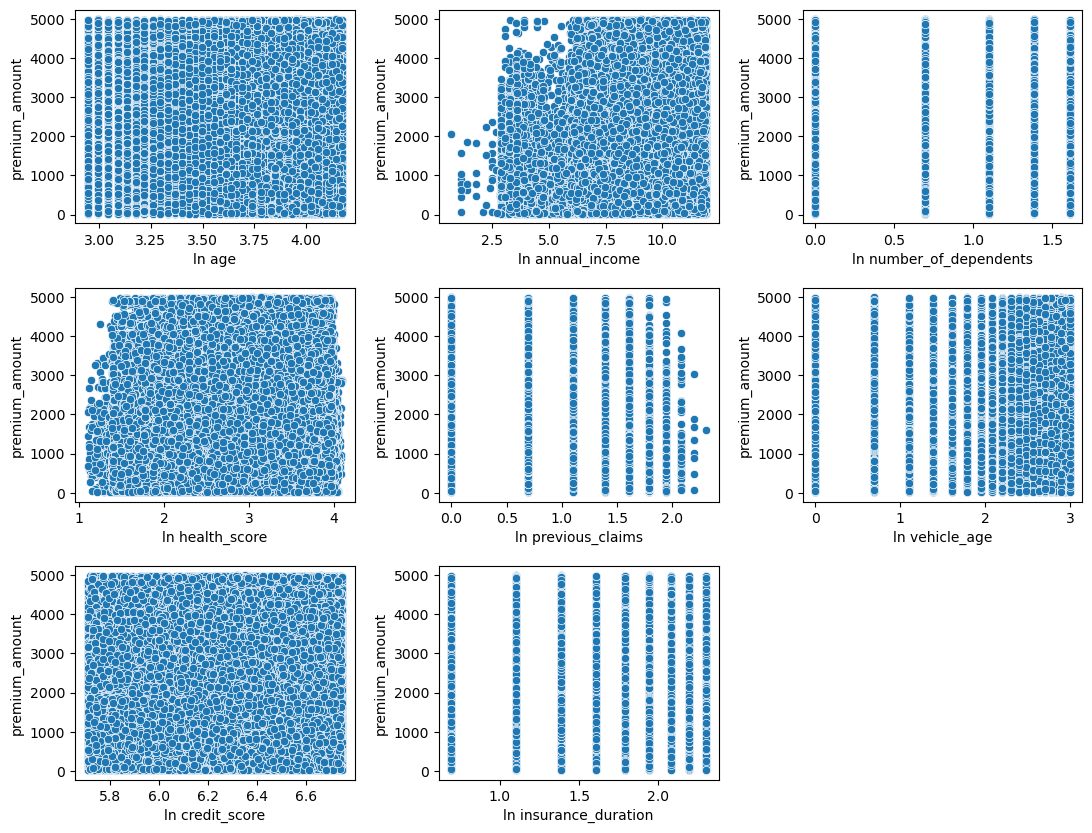

In [64]:
plt.figure(figsize=(13, 10))
for i, num_feat in enumerate(corr_mat.columns[1: -1]):
  plt.subplot(3, 3, i + 1)
  x = df.loc[:, num_feat].map(lambda x: np.log1p(x))
  sns.scatterplot(data=df, x=x, y='premium_amount')
  plt.xlabel(f'ln {num_feat}')
  plt.ylabel('premium_amount')
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

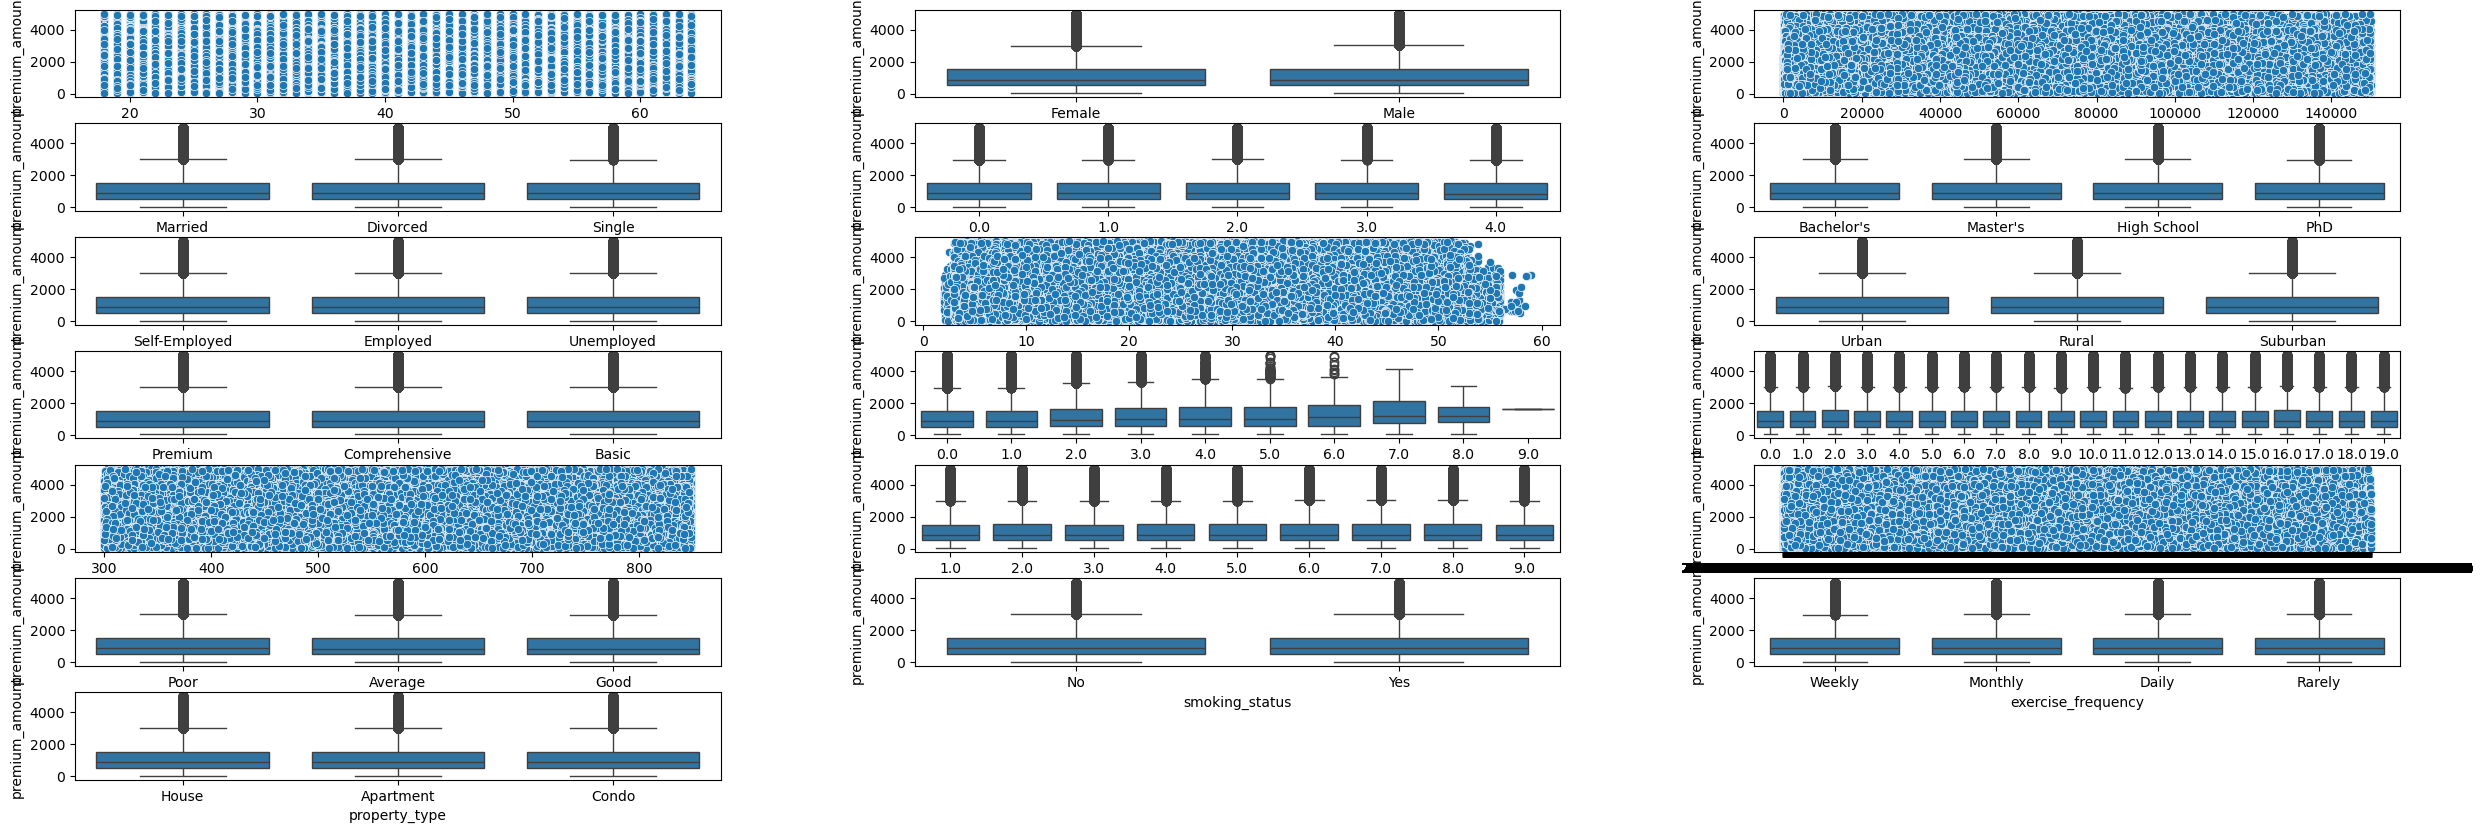

In [69]:
plt.figure(figsize=(30, 10))
for i, num_feat in enumerate(df.columns[1: -1]):
  plt.subplot(7, 3, i + 1)
  if df[num_feat].nunique() < 21:
    sns.boxplot(data=df, x=f'{num_feat}', y='premium_amount')
  else:
    sns.scatterplot(data=df, x=f'{num_feat}', y='premium_amount')
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

In [45]:
# import seaborn as sns
# sns.boxplot(data=df, x='age', y='premium_amount')